## Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
%matplotlib inline


In [2]:
def load_data(filepath):
    data = np.loadtxt(filepath, delimiter=',')
    X = data[:,:2]
    Y = data[:,2]
    return X,Y

In [3]:
x_train, y_train = load_data('data/students.txt')

In [4]:
print('Shape of x_train is: '+ str(x_train.shape))
print('Shape of y_train is: '+ str(y_train.shape))
print('Number of training examples (m) = %d ' % (len(y_train)))

Shape of x_train is: (100, 2)
Shape of y_train is: (100,)
Number of training examples (m) = 100 


In [5]:
admitted = y_train == 1
not_admitted = y_train == 0

tempx = y_train[admitted]
tempxn = y_train[not_admitted]

print(tempx[:5])
print(tempxn[:5])

[1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0.]


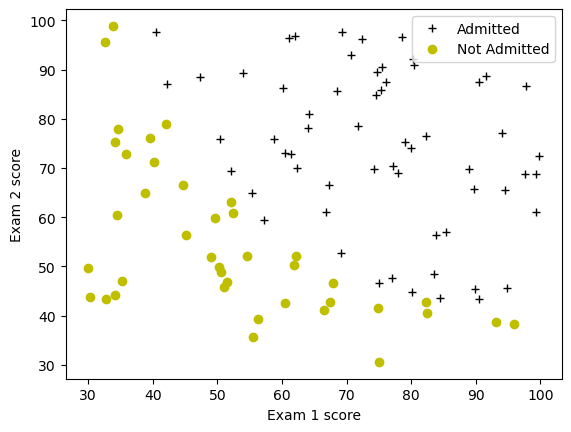

In [6]:
# Plotting the data 
plt.plot(x_train[admitted, 0], x_train[admitted, 1], 'k+', label='Admitted')
plt.plot(x_train[not_admitted, 0], x_train[not_admitted, 1], 'yo', label='Not Admitted')
plt.ylabel('Exam 2 score')
plt.xlabel('Exam 1 score')
plt.legend(loc='upper right')
plt.show()

In [7]:
# sigmoid function
# 'z' here is a numpy array of any size
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [8]:
# Function to compute cost for logistic regression
def cost_function(x, y, w, b):
    m,n = x.shape
    cost = 0
    for i in range(m):
        z = np.dot(x[i], w) + b
        f_wb = sigmoid(z)
        cost += -y[i]*np.log(f_wb) - (1 - y[i])*np.log(1 - f_wb)
    return cost/m

In [9]:
# Checking cost function
m,n = x_train.shape
w_init = np.zeros(n)
b_init = 0
cost = cost_function(x_train, y_train, w_init, b_init)
print('Cost: {:.3f}'.format(cost))

Cost: 0.693


In [10]:
# Compute gradient for 1 iteration over all training examples
def calculate_gradient(x, y, w, b):
    m,n = x.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0
    for i in range(m):
        f_wb_i = sigmoid(np.dot(x[i], w) + b)
        err_i = f_wb_i - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * x[i, j]
        dj_db = dj_db + err_i
    dj_dw /= m
    dj_db /= m

    return dj_dw, dj_db

In [11]:
w_init = np.zeros(n)
b_init = 0
dj_dw, dj_db = calculate_gradient(x_train, y_train, w_init, b_init)
print(f'dj_db: {dj_db}')
print(f'dj_dw: {dj_dw.tolist()}')

dj_db: -0.1
dj_dw: [-12.00921658929115, -11.262842205513591]


In [12]:
def gradient_descent(x, y, w, b, alpha, itrs):
    m = x.shape[0]
    J_track = []
    w_track = []
    for i in range(itrs):
        dj_dw, dj_db = calculate_gradient(x, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db

        if i<100000:
            cost = cost_function(x, y, w, b)
            J_track.append(cost)

        if i%math.ceil(itrs/10) == 0 or i ==(itrs - 1):
            w_track.append(w)
            print(f"Iteration {i:4}: Cost {float(J_track[-1]):8.2f}")
    return w,b, J_track, w_track

In [13]:
np.random.seed(1) #This guarantees that the random numbers generated by np.random are the same each time the code is run.
w_init = 0.01 * (np.random.rand(2).reshape(-1,1) - 0.5)
b_init = -8

iterations = 10000
alpha = 0.001
w, b, j_track, _ = gradient_descent(x_train, y_train, w_init, b_init, alpha, iterations)

Iteration    0: Cost     0.96


C:\Users\saura\AppData\Local\Temp\ipykernel_14672\3190375621.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Iteration {i:4}: Cost {float(J_track[-1]):8.2f}")


Iteration 1000: Cost     0.31
Iteration 2000: Cost     0.30
Iteration 3000: Cost     0.30
Iteration 4000: Cost     0.30
Iteration 5000: Cost     0.30
Iteration 6000: Cost     0.30
Iteration 7000: Cost     0.30
Iteration 8000: Cost     0.30
Iteration 9000: Cost     0.30
Iteration 9999: Cost     0.30


In [14]:
def predict(x,w,b):
    m,n = x.shape
    pr = np.zeros(m)
    for i in range(m):
        z_wb = np.dot(x[i],w) + b
        f_wb = sigmoid(z_wb)
        pr[i] = 1 if f_wb > 0.5 else 0

    return pr
        

In [15]:
predictions = predict(x_train, w, b)
print('Train Accuracy: %f'%(np.mean(predictions == y_train) * 100))

Train Accuracy: 92.000000
